In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import math as mp 
import seaborn as sns
%matplotlib inline

## Importation des données  : 

In [3]:
Sinistre=pd.read_excel("Sinistre_Fraude.xlsx") 

In [4]:
Assure=pd.read_excel('NewAssure.xlsx')

In [5]:
Police= pd.read_csv("NewPolice.csv",sep=',') 

C:\Users\ASUS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
BonusMalus=pd.read_excel('NewBonusMalus.xlsx')

## Analyse exploratoire  : 

### Le pourcentage des valeurs manquantes de chaque table : 

In [7]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

###  1) Table Sinistre  : 

In [8]:
draw_missing_data_table(Sinistre)

,Total,Percent
energie,1,0.00011
nbsinistre,0,0.00000
age,0,0.00000
CodeSinistre_id,0,0.00000
id_police,0,0.00000
CodeVehicule_id,0,0.00000
id_assure,0,0.00000
dateOuvertureDuSinistre,0,0.00000
lieuDuSinistre,0,0.00000
pourcentadeDeResponsabilite,0,0.00000


In [9]:
Sinistre.columns

Index(['Unnamed: 0', 'CodeSinistre_id', 'id_police', 'CodeVehicule_id',
       'id_assure', 'dateOuvertureDuSinistre', 'lieuDuSinistre',
       'pourcentadeDeResponsabilite', 'natureDuSinistre', 'Calculer_Sinistre',
       'CodePolice_Adverse', 'id_assure_adverse', 'gender', 'age',
       'gouvernorat', 'secteur_activite', 'date_permis', 'compagnie_actuelle',
       'usage', 'age_vehicule', 'ancienne_compagnie', 'dateEffetPolice',
       'naturePolice', 'dateInsertion', 'energie', 'puissanceFiscal', 'Marque',
       'Fraude', 'nbsinistre'],
      dtype='object')

In [10]:
Sinistre.shape

(9079, 29)

In [11]:
Sinistre=Sinistre.drop(['Unnamed: 0'],axis=1)

#### Comparison entre les  sinistres corporel / matériel  :  

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='natureDuSinistre', ylabel='count'>

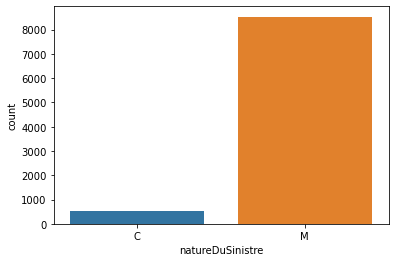

In [12]:
sns.countplot("natureDuSinistre", data=Sinistre)

In [13]:
Sinistre_Corporel=Sinistre.query('natureDuSinistre=="C" ')

### 2) Table Assure : 

In [14]:
draw_missing_data_table(Assure)

,Total,Percent
satisfaction,0,0.0
ancienne_compagnie,0,0.0
nb_sinistres,0,0.0
age_vehicule,0,0.0
usage,0,0.0
compagnie_actuelle,0,0.0
date_permis,0,0.0
secteur_activite,0,0.0
gouvernorat,0,0.0
age,0,0.0


In [15]:
Assure.columns

Index(['Unnamed: 0', 'key_0', 'CodeAssure_id', '_id', 'gender', 'age',
       'gouvernorat', 'secteur_activite', 'date_permis', 'compagnie_actuelle',
       'usage', 'age_vehicule', 'nb_sinistres', 'ancienne_compagnie',
       'satisfaction'],
      dtype='object')

In [16]:
type(Assure)

pandas.core.frame.DataFrame

In [17]:
Assure.shape

(35174, 15)

In [18]:
Assure=Assure.drop(['Unnamed: 0','key_0'],axis=1)

#### Assures / Secteur d'activite  : 

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='secteur_activite', ylabel='count'>

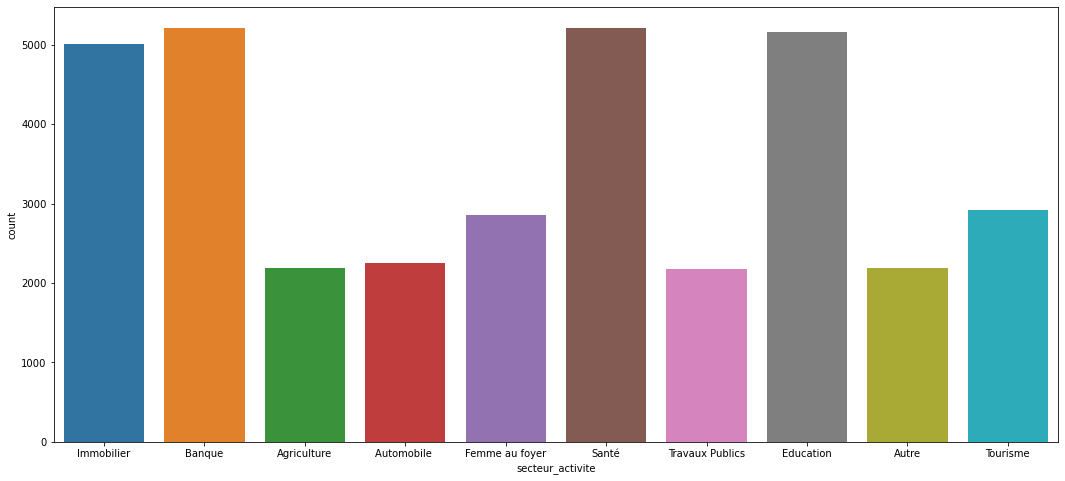

In [19]:
plt.figure(figsize=(18, 8))
sns.countplot("secteur_activite", data=Assure)

#### Assure - Nombre Sinistre corporel : 

In [20]:
Assure_Sinistre_Corporel=Sinistre_Corporel.groupby(['id_assure'])['natureDuSinistre'].count()
Assure_c=[]
Nb_Sinistre_c=[] 
for assure,nb_sinistre_c in Assure_Sinistre_Corporel.items(): 
    Assure_c.append(assure)
    Nb_Sinistre_c.append(nb_sinistre_c)

In [21]:
Assure_Corporel=pd.DataFrame({"CodeAssure_id":Assure_c,"Nb_Sinistre_c":Nb_Sinistre_c}) 

#### Assure - Nombre Total Sinistres : 

In [22]:
Assure_Sinistre=Sinistre.groupby(['id_assure'])['CodeSinistre_id'].count()
Assure_t=[]
Nb_Sinistre=[]
for assure,nb_sinistre in Assure_Sinistre.items(): 
    Assure_t.append(assure)
    Nb_Sinistre.append(nb_sinistre)

In [23]:
Assure_Sinistre_total=pd.DataFrame({"CodeAssure_id":Assure_t,"NombreTotalSinistres":Nb_Sinistre}) 

#### Jointure entre les deux Tables : 

In [24]:
Assure_Sinistres=pd.merge(Assure_Corporel,Assure_Sinistre_total,how="right",on="CodeAssure_id")

In [25]:
draw_missing_data_table(Assure_Sinistres)

,Total,Percent
Nb_Sinistre_c,3823,0.905281
NombreTotalSinistres,0,0.000000
CodeAssure_id,0,0.000000


##### Les valeurs nuls dans la colonne 'Nb_Sinistre_c' nous indique que les assurés n'ont pas eu des sinistre corporels , alors on va remplacer ces valeurs nuls par des zéros 

In [26]:
Assure_Sinistres['Nb_Sinistre_c']=Assure_Sinistres['Nb_Sinistre_c'].fillna(0)
Assure_Sinistres['Nb_Sinistre_c']=Assure_Sinistres['Nb_Sinistre_c'].astype(int)

### 3) Table Police : 

In [27]:
draw_missing_data_table(Police)

,Total,Percent
dateEcheancePolice,107475,0.104345
typePolice,0,0.000000
typeIntermediaire,0,0.000000
numPolice,0,0.000000
naturePolice,0,0.000000
dateEffetPolice,0,0.000000
codeCompagnie,0,0.000000
codeAgence,0,0.000000
Etat_Police,0,0.000000
CodePolice_id,0,0.000000


In [28]:
Police.columns

Index(['CodePolice_id', 'Etat_Police', 'codeAgence', 'codeCompagnie',
       'dateEcheancePolice', 'dateEffetPolice', 'naturePolice', 'numPolice',
       'typeIntermediaire', 'typePolice'],
      dtype='object')

In [29]:
Police.shape

(1030000, 10)

### 4) Table BonusMalus : 

In [30]:
draw_missing_data_table(BonusMalus)

,Total,Percent
coefBonusMalus,0,0.0
classeBonusMalusCompagnie,0,0.0
classeBonusMalus,0,0.0
DATE_AFFECTATION,0,0.0
ETAT_VEHICULE,0,0.0
codeUsage,0,0.0
CodeSouscripteur_id,0,0.0
CodeAssure_id,0,0.0
CodeVehicule_id,0,0.0
CodePolice_id,0,0.0


In [31]:
BonusMalus.columns

Index(['CodeBonusMalus_id', 'CodePolice_id', 'CodeVehicule_id',
       'CodeAssure_id', 'CodeSouscripteur_id', 'codeUsage', 'ETAT_VEHICULE',
       'DATE_AFFECTATION', 'classeBonusMalus', 'classeBonusMalusCompagnie',
       'coefBonusMalus'],
      dtype='object')

In [32]:
BonusMalus.shape

(637267, 11)

In [33]:
BonusMalus['DATE_AFFECTATION']=pd.to_datetime(BonusMalus['DATE_AFFECTATION'], format='%Y-%m-%d')

## BonusMalus 2015 : 

In [34]:
BonusMalus_2015 = BonusMalus.loc[(BonusMalus['DATE_AFFECTATION'] >= '2015-01-01') & (BonusMalus['DATE_AFFECTATION'] < '2015-12-31')]

In [35]:
Assure_2015_Fraude=BonusMalus_2015.groupby('CodeAssure_id').size().sort_values(ascending=False).head(12)

In [36]:
Assure_2015_Fraude

CodeAssure_id
53968      425
213237      15
416408       9
129532       8
51749        6
653678       5
548137       5
1026639      5
241608       5
241780       5
661743       4
269059       4
dtype: int64

## BonusMalus 2016 : 

In [37]:
BonusMalus_2016 = BonusMalus.loc[(BonusMalus['DATE_AFFECTATION'] >= '2016-01-01') & (BonusMalus['DATE_AFFECTATION'] < '2016-12-31')]

In [38]:
Assure_2016_=BonusMalus_2016.groupby('CodeAssure_id').size().sort_values(ascending=False).head(12)

In [39]:
Assure_2016_

CodeAssure_id
53968     1581
36330      150
46811      102
45825       87
53642       77
53806       63
53681       51
5817        40
36108       33
71676       28
26538       27
546392      24
dtype: int64

## BonusMalus 2017 : 

In [40]:
BonusMalus_2017 = BonusMalus.loc[(BonusMalus['DATE_AFFECTATION'] >= '2017-01-01') & (BonusMalus['DATE_AFFECTATION'] < '2017-12-31')]

In [41]:
Assure_2017_Fraude=BonusMalus_2017.groupby('CodeAssure_id').size().sort_values(ascending=False).head(1760)

In [42]:
Assure_2017_Fraude

CodeAssure_id
53968     1565
36330      381
36108      185
45825      165
46811      152
          ... 
293905       4
72713        4
319942       4
584512       4
550007       4
Length: 1760, dtype: int64

## BonusMalus 2018 : 

In [43]:
BonusMalus_2018 = BonusMalus.loc[(BonusMalus['DATE_AFFECTATION'] >= '2018-01-01') & (BonusMalus['DATE_AFFECTATION'] < '2018-12-31')]

In [44]:
Assure_2018_Fraude=BonusMalus_2018.groupby('CodeAssure_id').size().sort_values(ascending=False).head(185)

In [45]:
Assure_2018_Fraude

CodeAssure_id
300935     987
301091     952
300754     841
300600     817
36330      133
          ... 
63090        4
337802       4
1073781      4
141515       4
57969        4
Length: 185, dtype: int64

## BonusMalus 2019 : 

In [46]:
BonusMalus_2019 = BonusMalus.loc[(BonusMalus['DATE_AFFECTATION'] >= '2019-01-01') & (BonusMalus['DATE_AFFECTATION'] < '2019-12-31')]

In [47]:
Assure_2019_=BonusMalus_2019.groupby('CodeAssure_id').size().sort_values(ascending=False).head(10)

In [48]:
Assure_2019_

CodeAssure_id
778175    2
100573    2
778115    2
223343    1
258889    1
283922    1
302394    1
455114    1
562846    1
923295    1
dtype: int64

## Seulement les données de l'année 2016 et 2019 semblent correctes et bien saisies , les données des autres années contiennent des anomalies  

## Correspondances BonusMalus-Assure : 

In [49]:
BonusMalus_Assure=BonusMalus.CodeAssure_id.isin(Assure.CodeAssure_id).value_counts()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

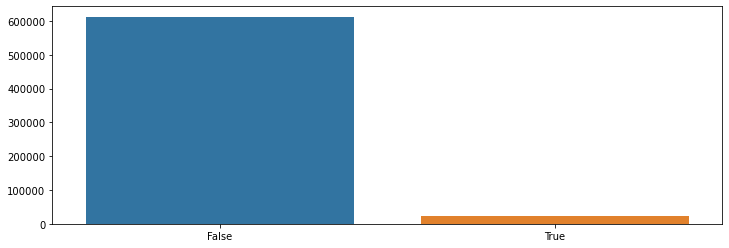

In [50]:
plt.figure(figsize=(12, 4))
sns.barplot(BonusMalus_Assure.index, BonusMalus_Assure.values)

### Table Bonus Malus : Supprimer Les lignes des assurés qui n'existent pas dans la table Assure   

In [51]:
BonusMalus=BonusMalus[BonusMalus.CodeAssure_id.isin(Assure.CodeAssure_id)]

### Table Assure : Supprimer Les lignes des assurés qui n'existent pas dans la table BonusMalus   

In [52]:
Assure=Assure[Assure.CodeAssure_id.isin(BonusMalus.CodeAssure_id)]

## Correspondance entre table générée :  Assure_Sinistres et la table Assure 

In [53]:
Assure_Sinistres=Assure_Sinistres[Assure_Sinistres.CodeAssure_id.isin(Assure.CodeAssure_id)]

In [54]:
Assure_Sinistres.CodeAssure_id.isin(Assure.CodeAssure_id).value_counts()

True    2059
Name: CodeAssure_id, dtype: int64

## Correspondance entre table : Assure et la table géneré Assure_Sinistres

In [55]:
Assure.CodeAssure_id.isin(Assure_Sinistres.CodeAssure_id).value_counts()

False    12793
True      2059
Name: CodeAssure_id, dtype: int64

#### on va ajouter 12793 assurés a la nouvelle table géneré avec un nombre de sinistre égale à zéro 

#### 1) Faire une jointure entre les deux tables Bonus Malus - Assure pour ajouter d'autre axes d'analyse  : 
       -Date Affectation
       -Classe BonusMalus Compagnie 

In [56]:
Assure=pd.merge(BonusMalus[['CodeAssure_id','CodePolice_id','classeBonusMalusCompagnie','DATE_AFFECTATION']],Assure,how='inner',on='CodeAssure_id')

#### Faire une jointure entre la table assure et la nouvelle table géneré pour affecter a chaque assuré le nombre de sinistre et le nombre de sinistre corporel  

In [57]:
Assure=pd.merge(Assure_Sinistres,Assure,how='right',on='CodeAssure_id')

In [58]:
Assure.columns

Index(['CodeAssure_id', 'Nb_Sinistre_c', 'NombreTotalSinistres',
       'CodePolice_id', 'classeBonusMalusCompagnie', 'DATE_AFFECTATION', '_id',
       'gender', 'age', 'gouvernorat', 'secteur_activite', 'date_permis',
       'compagnie_actuelle', 'usage', 'age_vehicule', 'nb_sinistres',
       'ancienne_compagnie', 'satisfaction'],
      dtype='object')

In [59]:
Assure['Nb_Sinistre_c']=Assure['Nb_Sinistre_c'].fillna(0)
Assure['NombreTotalSinistres']=Assure['NombreTotalSinistres'].fillna(0)
Assure['Nb_Sinistre_c']=Assure['Nb_Sinistre_c'].astype(int)
Assure['NombreTotalSinistres']=Assure['NombreTotalSinistres'].astype(int)

In [60]:
Assure

,CodeAssure_id,Nb_Sinistre_c,NombreTotalSinistres,CodePolice_id,classeBonusMalusCompagnie,DATE_AFFECTATION,_id,gender,age,gouvernorat,secteur_activite,date_permis,compagnie_actuelle,usage,age_vehicule,nb_sinistres,ancienne_compagnie,satisfaction
0,24431,1,2,278575,2,2017-11-25,7,male,31,Zaghouan,Banque,22/7/2009,Carte,Privé,13,1,Aucune,5
1,24431,1,2,450805,1,2017-07-04,7,male,31,Zaghouan,Banque,22/7/2009,Carte,Privé,13,1,Aucune,5
2,24431,1,2,436783,4,2017-05-30,7,male,31,Zaghouan,Banque,22/7/2009,Carte,Privé,13,1,Aucune,5
3,24431,1,2,410781,3,2016-04-01,7,male,31,Zaghouan,Banque,22/7/2009,Carte,Privé,13,1,Aucune,5
4,24431,1,2,410936,1,2016-04-01,7,male,31,Zaghouan,Banque,22/7/2009,Carte,Privé,13,1,Aucune,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24542,499098,0,0,613044,1,2017-11-14,6389,female,38,Sfax,Banque,9/4/2003,Bh assurance,Privé,12,1,El amana takaful,2
24543,29471,0,0,36138,1,2016-04-01,61,male,24,Monastir,Banque,17/4/2016,Gat,Privé,14,4,Ctama,3
24544,29485,0,0,36150,4,2016-04-16,63,female,36,Ariana,Femme au foyer,22/1/2009,Zitouna takaful,Professionnel,2,0,Biat-assurance,2
24545,30475,0,0,36479,1,2016-06-08,82,male,26,Ariana,Automobile,24/7/2020,Assurance Ami,Professionnel,20,2,Aucune,4


### Faire une jointure entre la table Assure et la table Police pour ajouter la date de signature du contrat d'assurance afin de calculer la duree entre la date effet police et la date d'affectation de la classe bonus Malus

In [61]:
Assure=pd.merge(Assure,Police[['CodePolice_id','dateEffetPolice','Etat_Police','naturePolice','typeIntermediaire']],how='inner',on='CodePolice_id')

In [62]:
Assure

,CodeAssure_id,Nb_Sinistre_c,NombreTotalSinistres,CodePolice_id,classeBonusMalusCompagnie,DATE_AFFECTATION,_id,gender,age,gouvernorat,...,compagnie_actuelle,usage,age_vehicule,nb_sinistres,ancienne_compagnie,satisfaction,dateEffetPolice,Etat_Police,naturePolice,typeIntermediaire
0,24431,1,2,278575,2,2017-11-25,7,male,31,Zaghouan,...,Carte,Privé,13,1,Aucune,5,2014-11-25,V,R,1
1,24431,1,2,450805,1,2017-07-04,7,male,31,Zaghouan,...,Carte,Privé,13,1,Aucune,5,2017-07-04,V,R,3
2,24431,1,2,436783,4,2017-05-30,7,male,31,Zaghouan,...,Carte,Privé,13,1,Aucune,5,2015-05-30,V,R,3
3,24431,1,2,410781,3,2016-04-01,7,male,31,Zaghouan,...,Carte,Privé,13,1,Aucune,5,2014-04-01,V,R,3
4,24431,1,2,410936,1,2016-04-01,7,male,31,Zaghouan,...,Carte,Privé,13,1,Aucune,5,2016-04-01,V,R,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24542,499098,0,0,613044,1,2017-11-14,6389,female,38,Sfax,...,Bh assurance,Privé,12,1,El amana takaful,2,2013-11-14,V,R,1
24543,29471,0,0,36138,1,2016-04-01,61,male,24,Monastir,...,Gat,Privé,14,4,Ctama,3,2016-04-01,V,R,3
24544,29485,0,0,36150,4,2016-04-16,63,female,36,Ariana,...,Zitouna takaful,Professionnel,2,0,Biat-assurance,2,2016-04-16,R,R,1
24545,30475,0,0,36479,1,2016-06-08,82,male,26,Ariana,...,Assurance Ami,Professionnel,20,2,Aucune,4,2009-06-08,R,R,1


In [63]:
dates_affectation=[]
for i in Assure['DATE_AFFECTATION'] : 
    dates_affectation.append(pd.to_datetime(i).year)

In [64]:
dates_effet=[]
for i in Assure['dateEffetPolice'] : 
    dates_effet.append(pd.to_datetime(i).year)

In [65]:
Duree=[] 
for i in range(0,len(dates_affectation)) : 
    Duree.append(dates_affectation[i]-dates_effet[i])

In [66]:
Assure.insert(3,"Duree",Duree,True)

In [67]:
Assure

,CodeAssure_id,Nb_Sinistre_c,NombreTotalSinistres,Duree,CodePolice_id,classeBonusMalusCompagnie,DATE_AFFECTATION,_id,gender,age,...,compagnie_actuelle,usage,age_vehicule,nb_sinistres,ancienne_compagnie,satisfaction,dateEffetPolice,Etat_Police,naturePolice,typeIntermediaire
0,24431,1,2,3,278575,2,2017-11-25,7,male,31,...,Carte,Privé,13,1,Aucune,5,2014-11-25,V,R,1
1,24431,1,2,0,450805,1,2017-07-04,7,male,31,...,Carte,Privé,13,1,Aucune,5,2017-07-04,V,R,3
2,24431,1,2,2,436783,4,2017-05-30,7,male,31,...,Carte,Privé,13,1,Aucune,5,2015-05-30,V,R,3
3,24431,1,2,2,410781,3,2016-04-01,7,male,31,...,Carte,Privé,13,1,Aucune,5,2014-04-01,V,R,3
4,24431,1,2,0,410936,1,2016-04-01,7,male,31,...,Carte,Privé,13,1,Aucune,5,2016-04-01,V,R,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24542,499098,0,0,4,613044,1,2017-11-14,6389,female,38,...,Bh assurance,Privé,12,1,El amana takaful,2,2013-11-14,V,R,1
24543,29471,0,0,0,36138,1,2016-04-01,61,male,24,...,Gat,Privé,14,4,Ctama,3,2016-04-01,V,R,3
24544,29485,0,0,0,36150,4,2016-04-16,63,female,36,...,Zitouna takaful,Professionnel,2,0,Biat-assurance,2,2016-04-16,R,R,1
24545,30475,0,0,7,36479,1,2016-06-08,82,male,26,...,Assurance Ami,Professionnel,20,2,Aucune,4,2009-06-08,R,R,1


In [68]:
BonusMalusCga=[]
for i in range(0,len(Assure)) : 
    x=0
    if Assure['NombreTotalSinistres'][i]==0 : 
        BonusMalusCga.append(8-int(Assure['Duree'][i]/2))
    else :
        if Assure['Nb_Sinistre_c'][i]!=0 : 
            x=x+2
        if (Assure['NombreTotalSinistres'][i]-Assure['Nb_Sinistre_c'][i])!=0:
            x=x+1
        BonusMalusCga.append(8+x) 

In [69]:
Assure.insert(6,"ClasseBonusMalusCGA",BonusMalusCga,True)

In [70]:
Fraude=[]
for i in range(0,len(Assure)) : 
    x=0
    if Assure['classeBonusMalusCompagnie'][i]==Assure['ClasseBonusMalusCGA'][i] : 
        Fraude.append(0)
    else :
        Fraude.append(1)

In [71]:
Assure.insert(6,"Fraude",Fraude,True)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


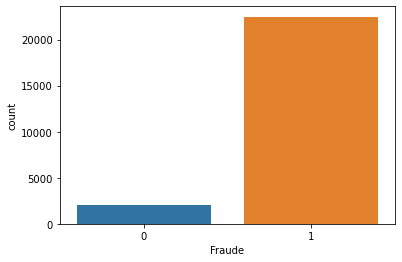

In [72]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.countplot(Assure['Fraude'],label="Count")
plt.show()

In [73]:
Assure.drop(['DATE_AFFECTATION'],axis=1,inplace=True)

In [74]:
# apply le on categorical feature columns
mask = Assure.dtypes==object
categorical_cols =  Assure.columns[mask].tolist()
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
Assure[categorical_cols] = Assure[categorical_cols].apply(lambda col: le.fit_transform(col))
Assure[categorical_cols].head(10)

,gender,gouvernorat,secteur_activite,date_permis,compagnie_actuelle,usage,ancienne_compagnie,dateEffetPolice,Etat_Police,naturePolice
0,1,12,3,2930,4,2,3,2304,2,0
1,1,12,3,2930,4,2,3,3239,2,0
2,1,12,3,2930,4,2,3,2482,2,0
3,1,12,3,2930,4,2,3,2078,2,0
4,1,12,3,2930,4,2,3,2785,2,0
5,1,12,3,2930,4,2,3,2116,2,0
6,0,5,6,259,5,2,4,547,0,0
7,0,5,6,259,5,2,4,757,0,0
8,0,10,8,288,12,2,15,1620,0,0
9,1,12,6,2141,12,3,9,2603,0,0


In [75]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler()

In [76]:
x=Assure.drop(['Fraude'],axis=1)
y=Assure['Fraude']

In [77]:
x_under, y_under = under.fit_resample(x, y)

In [78]:
y_under.to_excel("y_under.xlsx")

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


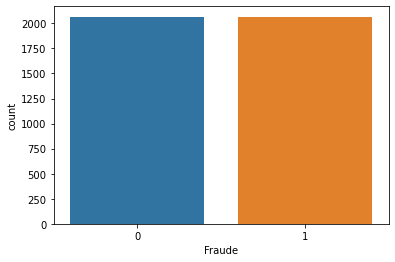

In [79]:
sns.countplot(y_under,label="Count")
plt.show()

In [80]:
#getting the feature after feature selection, we dropped 'typePolice' because it was not statistically significative on the chi squared test
features=['Nb_Sinistre_c', 'NombreTotalSinistres', 'Duree', 'classeBonusMalusCompagnie',
       'ClasseBonusMalusCGA', 'Etat_Police', 'naturePolice',
       'typeIntermediaire']
x_under=x_under[features]

In [81]:
x_under

,Nb_Sinistre_c,NombreTotalSinistres,Duree,classeBonusMalusCompagnie,ClasseBonusMalusCGA,Etat_Police,naturePolice,typeIntermediaire
0,1,3,4,11,11,2,0,1
1,0,5,2,9,9,2,0,1
2,0,5,2,9,9,0,0,2
3,0,2,2,9,9,0,0,1
4,0,2,3,9,9,2,0,1
...,...,...,...,...,...,...,...,...
4127,0,0,0,5,8,0,0,1
4128,0,5,0,4,9,2,0,1
4129,72,1186,0,4,11,2,0,2
4130,0,0,0,3,8,0,0,1


In [82]:
x_under.to_excel("x_under.xlsx")

In [82]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [83]:
train_X, test_X, train_y, test_y = train_test_split(
   x_under, y_under, test_size=0.2,random_state=0)

In [86]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_X, train_y)
predictions_knn = knn.predict(test_X)
acc_knn = accuracy_score(test_y, predictions_knn)
acc_knn

0.9866989117291415

In [87]:
y_pred=knn.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       425
           1       0.99      0.98      0.99       402

    accuracy                           0.99       827
   macro avg       0.99      0.99      0.99       827
weighted avg       0.99      0.99      0.99       827



In [88]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(train_X, train_y)
predictions = sgd.predict(test_X)
acc_sgd = accuracy_score(test_y, predictions)
acc_sgd

0.9673518742442564

In [89]:
y_pred=sgd.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       425
           1       1.00      0.93      0.97       402

    accuracy                           0.97       827
   macro avg       0.97      0.97      0.97       827
weighted avg       0.97      0.97      0.97       827



In [90]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(train_X, train_y)
predictions = gaussian.predict(test_X)
acc_gaussian = accuracy_score(test_y, predictions)
acc_gaussian

0.6964933494558646

In [91]:
y_pred=gaussian.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.97      0.77       425
           1       0.92      0.41      0.57       402

    accuracy                           0.70       827
   macro avg       0.78      0.69      0.67       827
weighted avg       0.77      0.70      0.67       827



In [92]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(train_X, train_y)
predictions = clf.predict(test_X)
acc_lda = accuracy_score(test_y, predictions)
acc_lda

0.9685610640870617

In [93]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15)
clf.fit(train_X, train_y)
predictions = clf.predict(test_X)
acc_rd = accuracy_score(test_y, predictions)
acc_rd

0.992744860943168

In [94]:
y_pred=clf.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       425
           1       1.00      0.99      0.99       402

    accuracy                           0.99       827
   macro avg       0.99      0.99      0.99       827
weighted avg       0.99      0.99      0.99       827



In [95]:
models = pd.DataFrame({
    'Model': ['KNN',
              'Random Forest',  
              'Linear Discriminant Analysis',
              'Gaussian Naive Bayes',
              'SGD Classifier'],
    'Score': [acc_knn, 
              acc_rd, 
              acc_lda, 
              acc_gaussian,
              acc_sgd
             ]})
models.sort_values(by="Score",ascending=False)

,Model,Score
1,Random Forest,0.992745
0,KNN,0.986699
2,Linear Discriminant Analysis,0.968561
4,SGD Classifier,0.967352
3,Gaussian Naive Bayes,0.696493


In [115]:
y=Assure[Assure.Fraude==0]["ClasseBonusMalusCGA"]
x=Assure[Assure.Fraude==0][features].drop(['ClasseBonusMalusCGA','classeBonusMalusCompagnie'],axis=1)

In [116]:
x

,Nb_Sinistre_c,NombreTotalSinistres,Duree,Etat_Police,naturePolice,typeIntermediaire
5516,1,3,4,2,0,1
5822,0,5,2,2,0,1
5908,0,5,2,0,0,2
6191,0,2,2,0,0,1
6200,0,2,3,2,0,1
...,...,...,...,...,...,...
24502,0,0,0,2,1,1
24505,0,0,0,2,1,1
24511,0,0,0,2,0,1
24521,0,0,0,2,0,1


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x.values,y.values, test_size = 0.3, random_state = 0)

In [122]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_rd=accuracy_score(y_test, y_pred)
acc_rd

0.9967741935483871

In [123]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[ 16   0   0   0   0   0   0   0   0]
 [  0   4   0   0   0   0   0   0   0]
 [  0   0   4   0   0   0   0   0   0]
 [  0   0   2   1   0   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0]
 [  0   0   0   0   0   9   0   0   0]
 [  0   0   0   0   0   0  13   0   0]
 [  0   0   0   0   0   0   0 553   0]
 [  0   0   0   0   0   0   0   0  16]]


In [124]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression( multi_class='multinomial', penalty='none', solver='newton-cg')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_lr=accuracy_score(y_test, y_pred)
acc_lr

0.9935483870967742

In [125]:
print(confusion_matrix(y_test, y_pred))

[[ 16   0   0   0   0   0   0   0   0]
 [  0   4   0   0   0   0   0   0   0]
 [  0   0   4   0   0   0   0   0   0]
 [  0   0   2   1   0   0   0   0   0]
 [  0   0   0   0   2   0   0   0   0]
 [  0   0   0   0   2   7   0   0   0]
 [  0   0   0   0   0   0  13   0   0]
 [  0   0   0   0   0   0   0 553   0]
 [  0   0   0   0   0   0   0   0  16]]


In [132]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
predictions_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, predictions_knn)
acc_knn

0.9903225806451613

In [127]:
models = pd.DataFrame({
    'Model': ['KNN',
              'Multinomial Logistic Regression',  
              'Random Forest'],
    'Score': [acc_knn, 
              acc_lr, 
              acc_rd
             ]})
models.sort_values(by="Score",ascending=False)

,Model,Score
2,Random Forest,0.996774
1,Multinomial Logistic Regression,0.993548
0,KNN,0.990323
